In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('bestsellers_with_categories.csv')
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет? 
Про 550 книг

In [4]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

1) Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [5]:
NANcount = {}
colomn = list(data)
for col in colomn:
    NANcount[col] = (sum(data[col].isna()))
NANcount

{'name': 0,
 'author': 0,
 'user_rating': 0,
 'reviews': 0,
 'price': 0,
 'year': 0,
 'genre': 0}

Відповідь: Чи є в якихось змінних пропуски? ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [6]:
pd.unique(data.genre)

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: Які є унікальні жанри?  'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: ylabel='Frequency'>

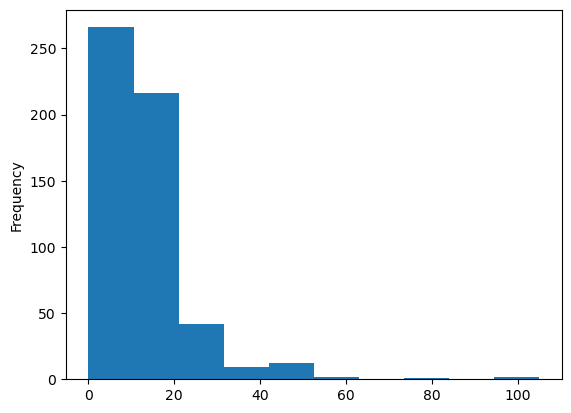

In [7]:
data.price.plot(kind='hist')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [8]:
price = data.agg({'price': ['min', 'max', 'mean', "median"]})
price

,price
min,0.0
max,105.0
mean,13.1
median,11.0


Відповідь: Максимальна ціна? 105.0

Відповідь: Мінімальна ціна? 0.0

Відповідь: Середня ціна? 13.1

Відповідь: Медіанна ціна? 11.0

2) Пошук та сортування даних

Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [9]:
rating = data.agg({'user_rating': ['max']})
rating

,user_rating
max,4.9


Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

In [10]:
max_rating_books = data[data.user_rating >= 4.9]
len(max_rating_books)

52

Відповідь: Яка книга має найбільше відгуків? Відповідь: Publication Manual of the American Psychological Association, 6th Edition, 10 шт

In [11]:
group_rating = data.groupby(['name'])[["name"]].agg(lambda e: len(e))
group_rating['name'].sort_values(ascending=False)

name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: name, Length: 351, dtype: int64

Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic.. -> price = 46

In [12]:
top_books_2015 = data[data.year == 2015]
top_books_2015.sort_values(by='price', ascending=False)

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
483,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2015,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
492,The Wright Brothers,David McCullough,4.7,6169,16,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [13]:
top_books_2010 = data[(data.year == 2010) & (data.genre == 'Fiction')]
print(len(top_books_2010))
top_books_2010


20


,name,author,user_rating,reviews,price,year,genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
61,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.3,1924,8,2010,Fiction
218,Little Bee: A Novel,Chris Cleave,4.1,1467,10,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
292,Sarah's Key,Tatiana de Rosnay,4.6,3619,10,2010,Fiction
340,The Art of Racing in the Rain: A Novel,Garth Stein,4.7,11813,10,2010,Fiction
357,The Confession: A Novel,John Grisham,4.3,3523,13,2010,Fiction
384,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,7747,14,2010,Fiction


Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1 - Jesus Calling: Enjoying Peace in His Presence 

In [14]:
top_books_2010_2011 = data[(data.user_rating >= 4.9) & ((data.year == 2010) | (data.year == 2011))]
top_books_2010_2011

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [15]:
top_books_2015[top_books_2015.price <= 8].sort_values(by='price', ascending=True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


Відповідь: Яка книга остання у відсортованому списку? Відповідь: Jesus Calling: Enjoying Peace in His Presence ...	

3. Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [16]:
grouped_data = data[['name', 'price', "genre"]].groupby('genre')
grouped_data.head()

,name,price,genre
0,10-Day Green Smoothie Cleanse,8,Non Fiction
1,11/22/63: A Novel,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,15,Non Fiction
3,1984 (Signet Classics),6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",12,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),11,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,30,Fiction
7,A Gentleman in Moscow: A Novel,15,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",3,Non Fiction
11,A Patriot's History of the United States: From...,2,Non Fiction


In [17]:
grouped_data.agg({'price': ['min', "max"]})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [18]:
books_author = data[['name', 'author']].groupby('author')
books_author.head()

,name,author
0,10-Day Green Smoothie Cleanse,JJ Smith
1,11/22/63: A Novel,Stephen King
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson
3,1984 (Signet Classics),George Orwell
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids
...,...,...
544,Wonder,R. J. Palacio
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero


In [19]:
count_books = books_author.agg({'name': ['count']})
count_books

,name
,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2


Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248 x 1

In [20]:
count_books['name'].agg({('count'):['max', 'idxmax']})

,count
max,12
idxmax,Jeff Kinney


Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney

In [21]:
count_books['name'].agg({'count': ['max']})

,count
max,12


Відповідь: Скільки книг цього автора? Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [22]:
rating_author = data[['user_rating', 'author']].groupby('author')
rating_author.head()

,user_rating,author
0,4.7,JJ Smith
1,4.6,Stephen King
2,4.7,Jordan B. Peterson
3,4.7,George Orwell
4,4.8,National Geographic Kids
...,...,...
544,4.8,R. J. Palacio
546,4.7,Jen Sincero
547,4.7,Jen Sincero
548,4.7,Jen Sincero


In [23]:
count_rating = rating_author.agg({'user_rating': ['mean']})
count_rating

,user_rating
,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Alice Schertle

Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

In [24]:
count_rating.agg(['min', 'idxmax'])

,user_rating
,mean
min,3.9
idxmax,Alice Schertle


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [25]:
concat_author = pd.concat([count_books, count_rating], axis=1 )
concat_author

,name,user_rating
,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [26]:
concat_author.sort_values(by=[('name',"count"), ('user_rating',"mean")], ascending=[True, True])

,name,user_rating
,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636


Відповідь: Який автор перший у списку?  Muriel Barbery